In [10]:
# importing the libraries

import pandas as pd
import numpy as np

In [11]:
# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries for data and statistical modeling
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import pearsonr,spearmanr,f_oneway,chi2_contingency

In [12]:
rent_df = pd.read_csv('House_Rent_Dataset.csv')

rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [16]:
# manually removing null values

rent_df = rent_df[rent_df['Rent'] != ' ']
rent_df.reset_index(drop=True, inplace=True)

In [17]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [21]:
rent_df['Posted On'] = rent_df['Posted On'].apply(pd.to_datetime)

In [22]:
rent_df.info

<bound method DataFrame.info of       Posted On  BHK   Rent  Size            Floor    Area Type  \
0    2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1    2022-05-13    2  20000   800       1 out of 3   Super Area   
2    2022-05-16    2  17000  1000       1 out of 3   Super Area   
3    2022-07-04    2  10000   800       1 out of 2   Super Area   
4    2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...         ...  ...    ...   ...              ...          ...   
4741 2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742 2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743 2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744 2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745 2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1

In [23]:
import pandas as pd

# Assuming df is your DataFrame
rent_df.drop(columns=['Floor'], inplace=True)
rent_df.drop(columns=['Area Type'], inplace=True)

In [24]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Area Locality      4746 non-null   object        
 5   City               4746 non-null   object        
 6   Furnishing Status  4746 non-null   object        
 7   Tenant Preferred   4746 non-null   object        
 8   Bathroom           4746 non-null   int64         
 9   Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 370.9+ KB


In [25]:
rent_df.drop(columns=['Area Locality'], inplace=True)

In [26]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   City               4746 non-null   object        
 5   Furnishing Status  4746 non-null   object        
 6   Tenant Preferred   4746 non-null   object        
 7   Bathroom           4746 non-null   int64         
 8   Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 333.8+ KB


In [27]:
rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

## Data Visualisation
Subplots of Demographic Variables
Subplots of scatter chart
Distribution plot for continous variables

In [28]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [29]:
rent_df.drop(columns=['Posted On'], inplace=True)

In [30]:
rent_df.columns

Index(['BHK', 'Rent', 'Size', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

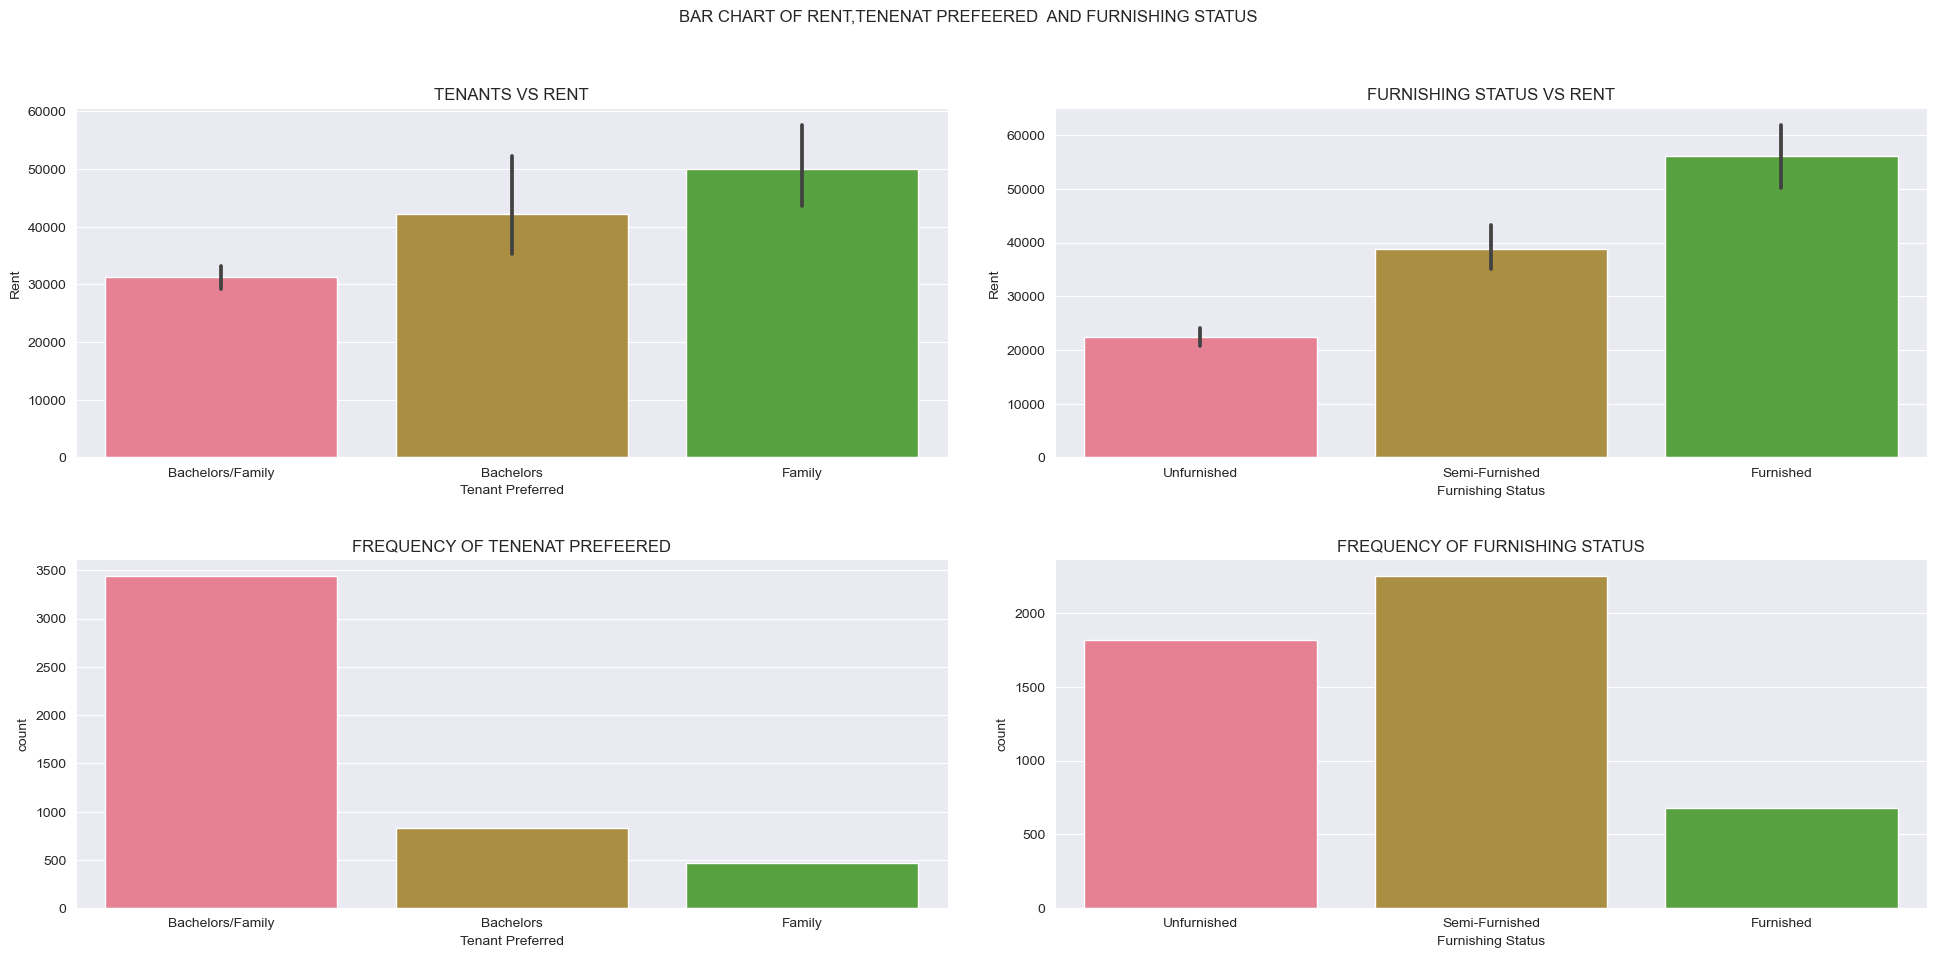

In [31]:
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= rent_df, x = 'Tenant Preferred', y = 'Rent', ax=axes[0,0])
sns.barplot(data= rent_df, x = 'Furnishing Status', y = 'Rent', ax=axes[0,1])
sns.countplot(data= rent_df, x = 'Tenant Preferred', ax=axes[1,0])
sns.countplot(data= rent_df, x = 'Furnishing Status', ax=axes[1,1])

axes[0,0].set_title('TENANTS VS RENT')
axes[0,1].set_title('FURNISHING STATUS VS RENT')
axes[1,0].set_title('FREQUENCY OF TENENAT PREFEERED')
axes[1,1].set_title('FREQUENCY OF FURNISHING STATUS')

plt.suptitle('BAR CHART OF RENT,TENENAT PREFEERED  AND FURNISHING STATUS')

fig.tight_layout(pad= 3)

In [32]:
def get_chart(x, y, dim, title):
    
    fig, axes = plt.subplots(dim[0],dim[1], figsize = (20,10))
    sns.barplot(data= rent_df, x = x[0], y = y[0], ax=axes[0,0])
    sns.barplot(data= rent_df, x = x[1], y = y[0], ax=axes[0,1])
    sns.barplot(data= rent_df, x = x[0], y = y[1], ax=axes[1,0])
    sns.barplot(data= rent_df, x = x[1], y = y[1], ax=axes[1,1])

    axes[0,0].set_title(f'{x[0].upper()} VS {y[0].upper()}')
    axes[0,1].set_title(f'{x[1].upper()} VS {y[0].upper()}')
    axes[1,0].set_title(f'{x[0].upper()} VS {y[1].upper()}')
    axes[1,1].set_title(f'{x[1].upper()} VS {y[1].upper()}')
    
    fig.tight_layout(pad=3)


    plt.suptitle(title)

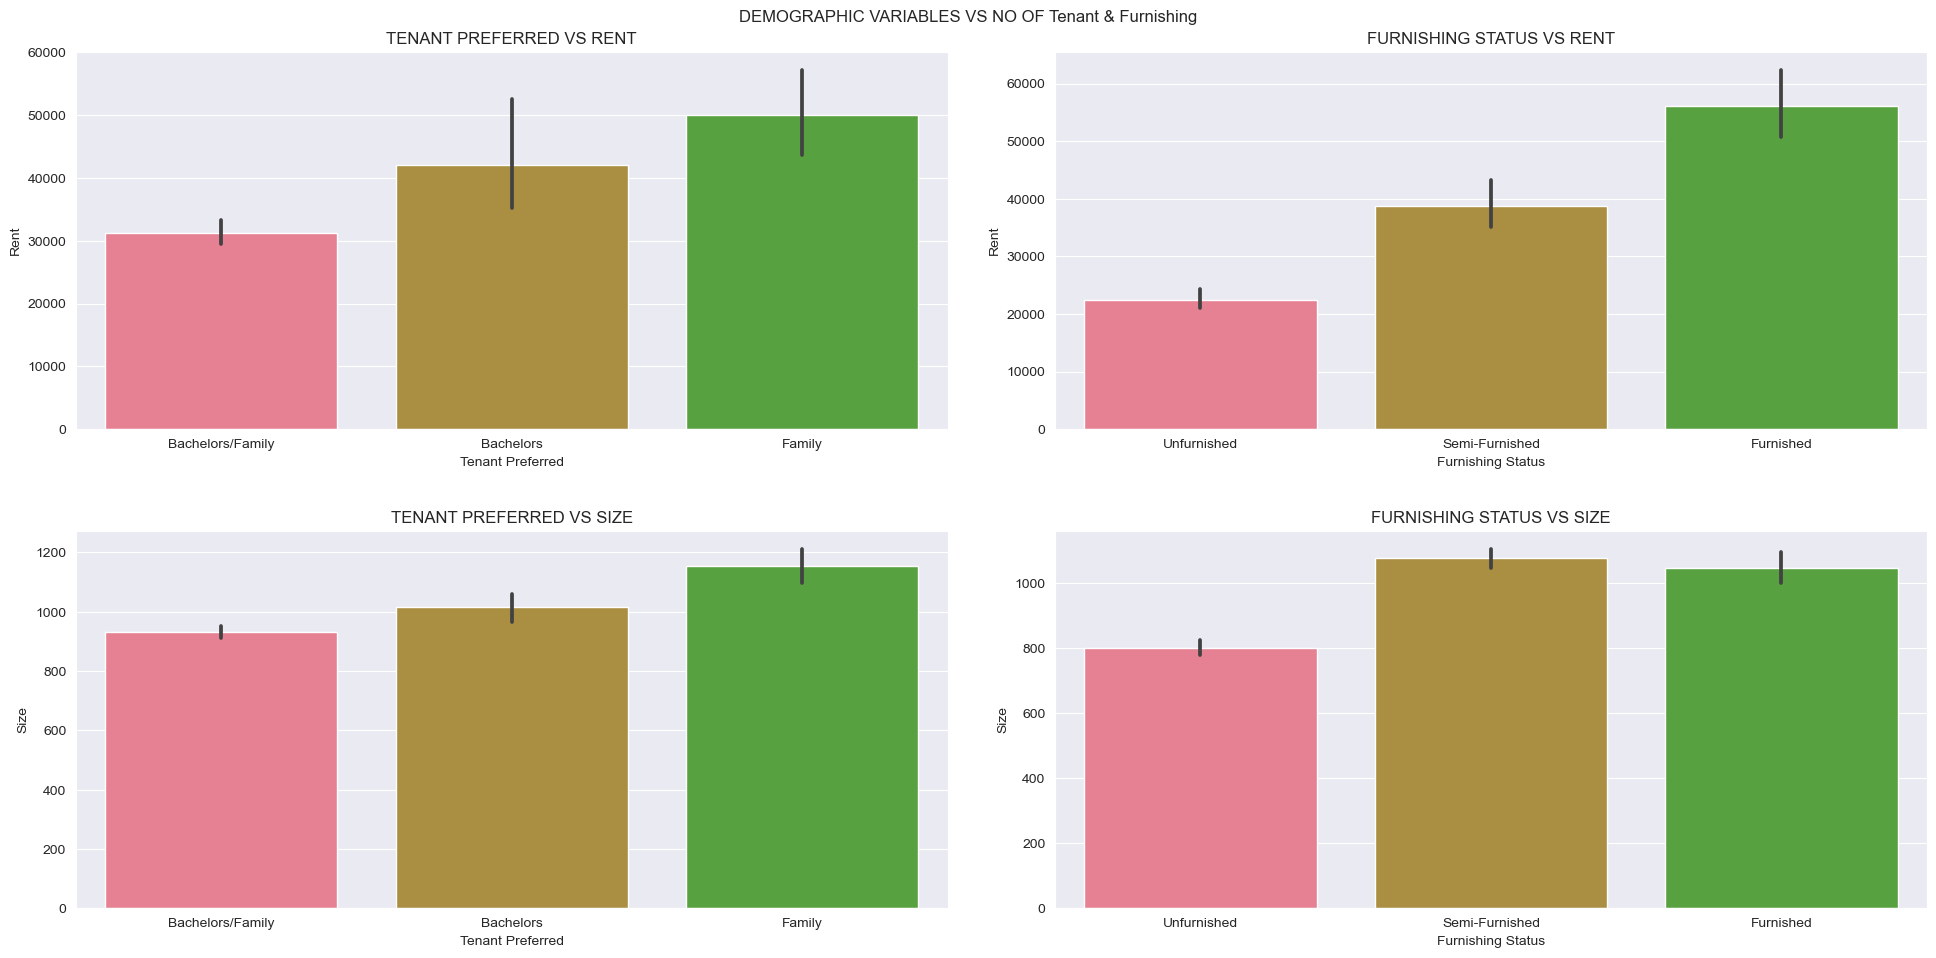

In [36]:
get_chart(x = ['Tenant Preferred', 'Furnishing Status'],
          y = ['Rent', 'Size'],
          dim= [2,2],
          title= 'DEMOGRAPHIC VARIABLES VS NO OF Tenant & Furnishing')

TypeError: cannot unpack non-iterable function object

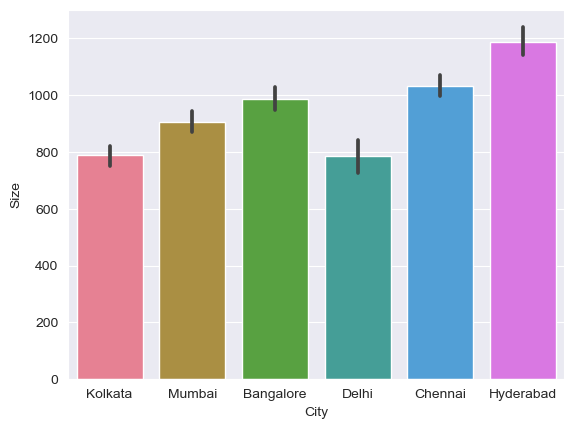

In [55]:
sns.set_style('darkgrid')
sns.set_palette('husl')

sns.barplot(data=rent_df, x = 'City', y = 'Size')
fig, axes = plt.subplots 

plt.title('DEMOGRAPHIC VARIABLE OF CITIES AND SIZE')
plt.show()

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

rent_df = pd.read_csv('House_Rent_Dataset.csv')
labels = rent_df['City']
sizes = rent_df['Size']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice if needed

plt.show()

# INSIGHT

In [80]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## INSPECT CORRELATION

Correlation measures the relationship between two or more continuous variables

<Axes: >

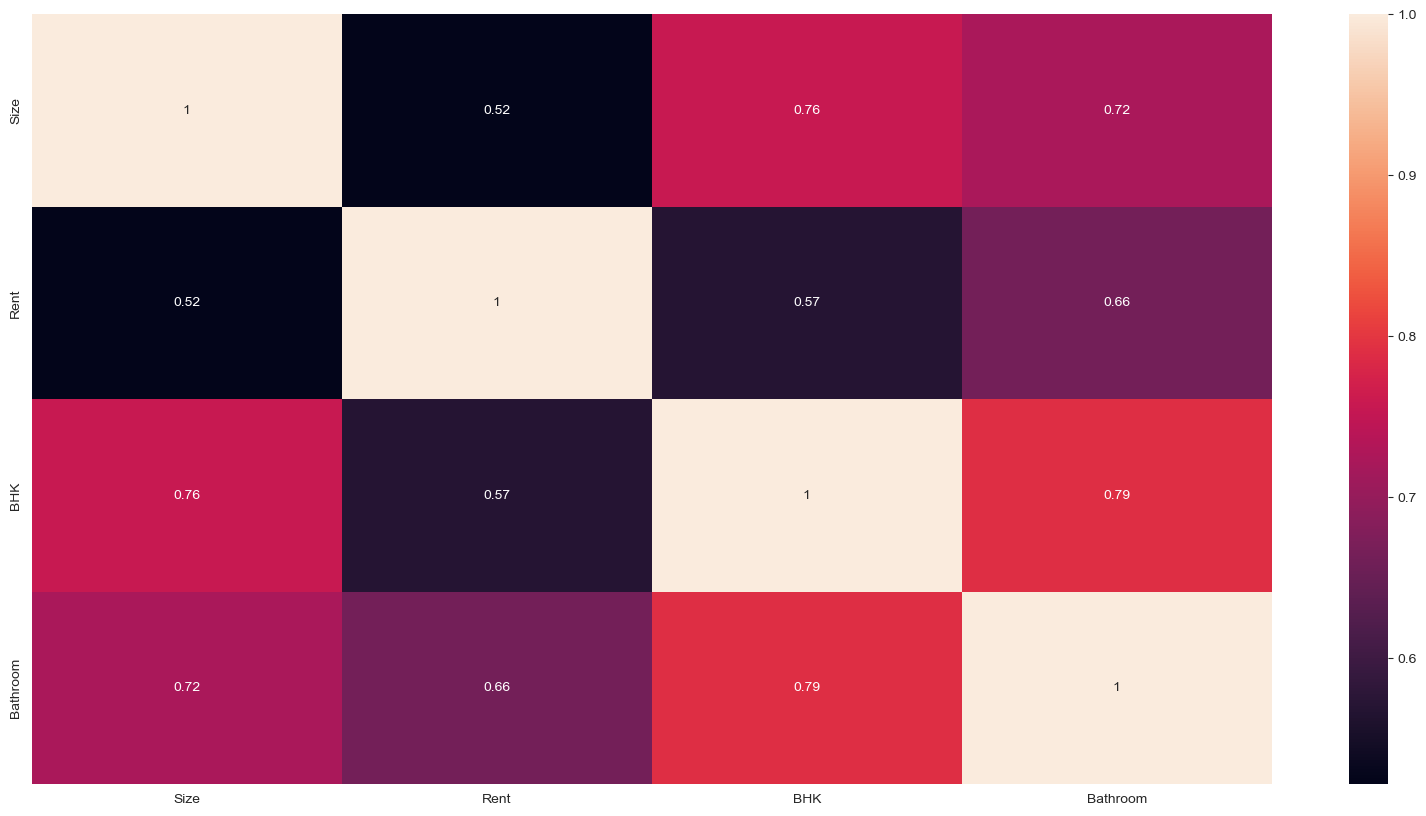

In [85]:
# inspecting correlation matrix 
corr_matrix = rent_df[['Size','Rent','BHK','Bathroom']].corr(method='spearman')



fig = plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot= True)